# 09 Recurrent Neural Networks
**Adapted from Deep Learning with Pyton by Francois Chollet**

https://github.com/fchollet/deep-learning-with-python-notebooks

### Recurrent Neural Networks

`SimpleRNN` processes batches of sequences, like all other Keras layers. It takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps, input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor 
argument. 

#### Embedding

Turns positive integers (indexes) into dense vectors of fixed size. eg. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

This layer can only be used as the first layer in a model.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

W0815 11:08:55.363599 139620944815936 deprecation_wrapper.py:119] From /home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 11:08:55.382252 139620944815936 deprecation_wrapper.py:119] From /home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 11:08:55.386027 139620944815936 deprecation_wrapper.py:119] From /home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


To increase the representational power of a network several recurrent layers one after can be stacked with all intermediate layers returning full sequences.

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # this last layer only returns the last outputs
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


IMDB movie review classification problem.

Preprocess the data:

In [8]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # number of words to consider as features
maxlen = 500 # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# problems with numpy latest version and load_data()
# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
# call load_data with allow_pickle implicitly set to true
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# restore np.load for future normal usage
np.load = np_load_old

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

W0815 11:12:21.748523 139620944815936 deprecation_wrapper.py:119] From /home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 11:12:21.767774 139620944815936 deprecation_wrapper.py:119] From /home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0815 11:12:21.777270 139620944815936 deprecation.py:323] From /home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0815 11:12:22.052869 139620944815936 deprecation_wrapper.py:119] From /home/mabeigier/anaconda3/envs/skle

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6537 - acc: 0.6050 - val_loss: 0.5125 - val_acc: 0.7782
Epoch 2/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.4130 - acc: 0.8269 - val_loss: 0.4055 - val_acc: 0.8212
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.3040 - acc: 0.8782 - val_loss: 0.4131 - val_acc: 0.8102
Epoch 4/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2264 - acc: 0.9140 - val_loss: 0.3854 - val_acc: 0.8350
Epoch 5/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1660 - acc: 0.9392 - val_loss: 0.3747 - val_acc: 0.8592
Epoch 6/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1059 - acc: 0.9642 - val_loss: 0.4290 - val_acc: 0.8446
Epoch 7/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.0683 - acc: 0.9782 - val_loss: 0.4984 - val_acc:

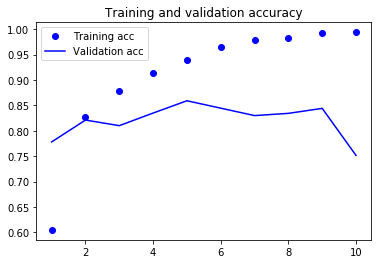

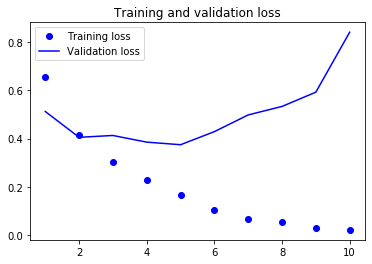

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();